In [1]:
import xgboost

import shap

In [92]:
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
22278,27.0,4,10.0,0,1,1,4,0,0.0,0.0,44.0,39
8950,27.0,4,13.0,4,10,0,4,0,0.0,0.0,40.0,39
7838,25.0,4,12.0,2,12,4,4,1,0.0,0.0,40.0,39
16505,46.0,4,3.0,2,14,4,0,1,0.0,1902.0,40.0,39
19140,45.0,4,7.0,0,14,0,4,1,0.0,2824.0,76.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
321,43.0,4,10.0,2,3,4,4,1,0.0,1485.0,50.0,39
19092,44.0,4,10.0,0,4,2,4,0,0.0,0.0,45.0,39
29928,47.0,6,16.0,2,14,4,4,1,0.0,2002.0,45.0,39
4507,52.0,4,10.0,2,7,4,4,1,0.0,0.0,40.0,39


TypeError: 'XGBClassifier' object is not callable

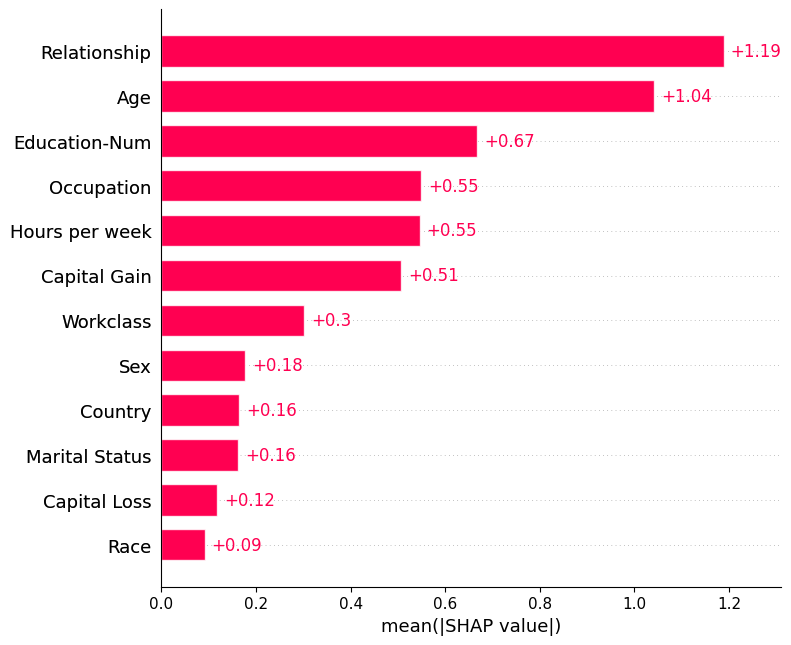

In [97]:
# train XGBoost model
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)


# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=12)

In [119]:
y_binary = [1 if income == True else 0 for income in y]
predict = model.predict(X)
Wrong_pred = []
for i in range(len(predict)):
    if predict[i] != y_binary[i]:
        Wrong_pred.append(i)

In [120]:
len(Wrong_pred)

74

In [121]:
Wrong_pred

[26,
 54,
 80,
 109,
 154,
 166,
 191,
 234,
 254,
 275,
 320,
 332,
 379,
 461,
 472,
 478,
 486,
 575,
 619,
 641,
 676,
 688,
 740,
 760,
 769,
 791,
 838,
 854,
 891,
 900,
 928,
 946,
 949,
 970,
 1015,
 1060,
 1077,
 1078,
 1081,
 1104,
 1110,
 1143,
 1181,
 1184,
 1194,
 1241,
 1260,
 1262,
 1263,
 1285,
 1295,
 1308,
 1322,
 1416,
 1475,
 1482,
 1550,
 1580,
 1584,
 1621,
 1626,
 1654,
 1768,
 1775,
 1796,
 1821,
 1828,
 1832,
 1840,
 1855,
 1857,
 1898,
 1981,
 1985]

In [3]:
features = []
values = []
for feature, value in zip(shap_values.feature_names, shap_values.values.mean(axis=0)):
    print(f"Feature: {feature}, Value: {value}")
    features.append(feature)
    values.append(value)

Feature: Age, Value: 0.019877746563360013
Feature: Workclass, Value: 0.037034297399680394
Feature: Education-Num, Value: -0.04566514782969691
Feature: Marital Status, Value: -0.0018550093332273543
Feature: Occupation, Value: 0.02659017663474602
Feature: Relationship, Value: -0.07057838241285233
Feature: Race, Value: 0.009732152108252559
Feature: Sex, Value: 0.011971603518377234
Feature: Capital Gain, Value: 0.1705530854767793
Feature: Capital Loss, Value: 0.03028674932202907
Feature: Hours per week, Value: 0.02322219604708106
Feature: Country, Value: 0.02634668925409456


In [ ]:
"""

Feature: Age, Value: 1.04
Feature: Workclass, Value: 0.29
Feature: Education-Num, Value: 0.59
Feature: Marital Status, Value: -0.14
Feature: Occupation, Value: 0.56
Feature: Relationship, Value: 1.24
Feature: Race, Value: 0.1
Feature: Sex, Value: 0.22
Feature: Capital Gain, Value: 0.49
Feature: Capital Loss, Value: 0.13
Feature: Hours per week, Value: 0.57
Feature: Country, Value: 0.18
"""

In [40]:

for i in range(len(shap_values)):
    values = shap_values[i].values
    data = shap_values[i].data
    # all_positive = all(value < 0 for value in values)
    if data[8] > 13000 and data[2]<3:
        print(f"in [{i}] are {y[i]}.")
    
    

In [36]:
shap_values[415].data[2]

3.0

In [90]:
y[653]

False

In [91]:
shap_values[653]

.values =
array([-1.84830222, -0.02591961, -2.0678254 ,  0.07451548, -1.07414642,
        0.57346407,  0.11611002,  0.15054857,  5.65077203, -0.01893019,
       -0.03924661,  0.07882923])

.base_values =
-3.034144449280776

.data =
array([6.7000e+01, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.4000e+01,
       4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0566e+04, 0.0000e+00,
       4.0000e+01, 3.9000e+01])

In [108]:
y[26]

False

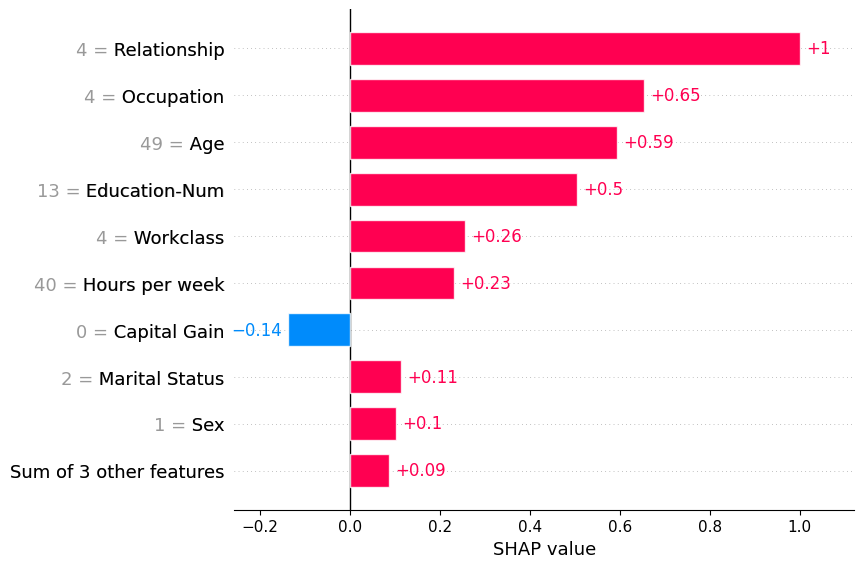

predct: 1 Label: 0


In [126]:
index = 54
shap.plots.bar(shap_values[index])
print("predct:",predict[index], "Label:",y_binary[index])

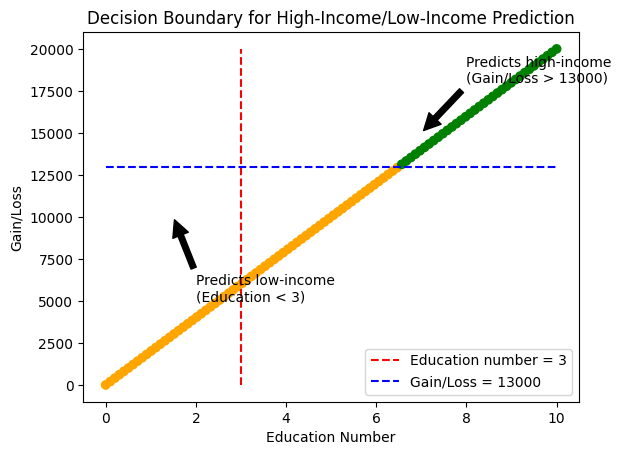

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
education_number = np.linspace(0, 10, 100)
gain_loss = np.linspace(0, 20000, 100)
income = ['low-income' if e < 3 or g < 13000 else 'high-income' for e, g in zip(education_number, gain_loss)]

# Creating the plot
fig, ax = plt.subplots()

# Plotting decision boundaries
ax.plot([3, 3], [0, 20000], 'r--', label='Education number = 3')
ax.plot([0, 10], [13000, 13000], 'b--', label='Gain/Loss = 13000')

# Scatter plot of the data points
colors = ['green' if inc == 'high-income' else 'orange' for inc in income]
ax.scatter(education_number, gain_loss, c=colors)

# Adding annotations
ax.annotate('Predicts low-income\n(Education < 3)', xy=(1.5, 10000), xytext=(2, 5000),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Predicts high-income\n(Gain/Loss > 13000)', xy=(7, 15000), xytext=(8, 18000),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Labels and legend
ax.set_xlabel('Education Number')
ax.set_ylabel('Gain/Loss')
ax.legend()

plt.title('Decision Boundary for High-Income/Low-Income Prediction')
plt.show()


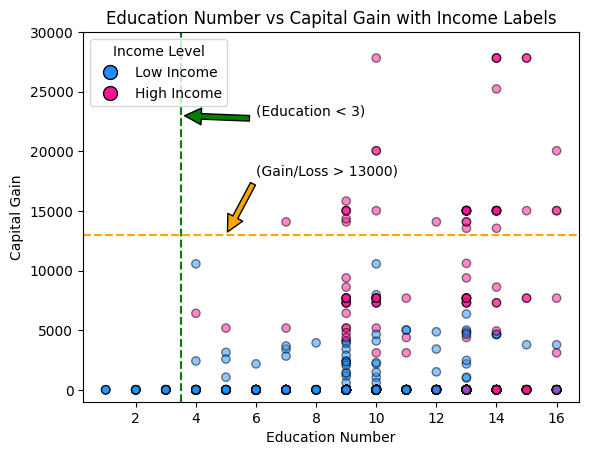

In [107]:
import shap
import matplotlib.pyplot as plt

# Load the dataset
X, y = shap.datasets.adult(n_points=2000)

# Convert y to binary high-income and low-income
# Assuming high income is represented by '>50K' and low income by '<=50K'
y_binary = predict

# Plotting
fig, ax = plt.subplots()

# Scatter plot of education-num vs. capital-gain with colors representing high-income and low-income
colors = ['deeppink' if income == 1 else 'dodgerblue' for income in y_binary]

# Extract relevant features
education_num = X['Education-Num']
capital_gain = X['Capital Gain']

# Scatter plot
scatter = ax.scatter(education_num, capital_gain, c=colors, alpha=0.5, edgecolor='k')

# Adding labels and title
ax.set_xlabel('Education Number')
ax.set_ylabel('Capital Gain')
ax.set_title('Education Number vs Capital Gain with Income Labels')

# Create a legend
legend_labels = {0: 'Low Income', 1: 'High Income'}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], 
                      markersize=10, markerfacecolor=c, markeredgecolor='k') for i, c in zip(legend_labels.keys(), ['dodgerblue', 'deeppink'])]
ax.legend(handles=handles, title="Income Level")

# Decision boundaries
ax.axhline(y=13000, color='orange',linestyle='--', label='Gain/Loss = 13000')
ax.axvline(x=3.5, color='green', linestyle='--', label='Education number = 3')

# # Adding annotations
ax.annotate('(Education < 3)', xy=(3.5, 23000), xytext=(6, 23000),
            arrowprops=dict(facecolor='green', shrink=0.05))
ax.annotate('(Gain/Loss > 13000)', xy=(5, 13000), xytext=(6, 18000),
            arrowprops=dict(facecolor='orange', shrink=0.05))
plt.ylim((-1000, 30000))
plt.show()


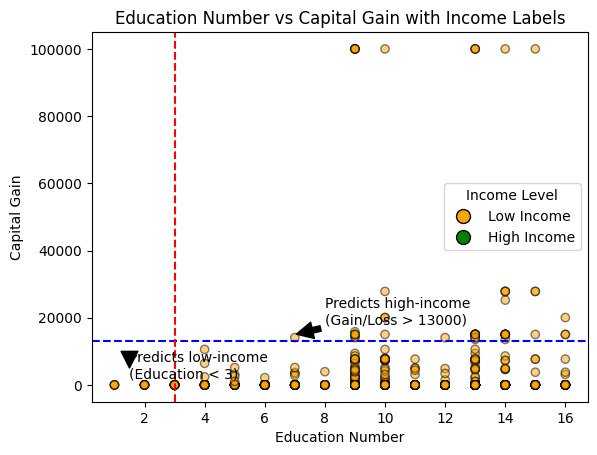

In [47]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
X, y = shap.datasets.adult(n_points=2000)

# Convert y to binary high-income and low-income
# Assuming high income is represented by '>50K' and low income by '<=50K'
y_binary = [1 if income == '>50K' else 0 for income in y]

# Plotting
fig, ax = plt.subplots()

# Scatter plot of education-num vs. capital-gain with colors representing high-income and low-income
colors = ['green' if income == 1 else 'orange' for income in y_binary]

# Extract relevant features
education_num = X['Education-Num']
capital_gain = X['Capital Gain']

# Scatter plot
scatter = ax.scatter(education_num, capital_gain, c=colors, alpha=0.5, edgecolor='k')

# Adding labels and title
ax.set_xlabel('Education Number')
ax.set_ylabel('Capital Gain')
ax.set_title('Education Number vs Capital Gain with Income Labels')

# Create a legend
legend_labels = {0: 'Low Income', 1: 'High Income'}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], 
                      markersize=10, markerfacecolor=c, markeredgecolor='k') for i, c in zip(legend_labels.keys(), ['orange', 'green'])]
ax.legend(handles=handles, title="Income Level")

# Decision boundaries
ax.axhline(y=13000, color='blue', linestyle='--', label='Gain/Loss = 13000')
ax.axvline(x=3, color='red', linestyle='--', label='Education number = 3')

# Adding annotations
ax.annotate('Predicts low-income\n(Education < 3)', xy=(1.5, 5000), xytext=(1.5, 2000),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Predicts high-income\n(Gain/Loss > 13000)', xy=(7, 15000), xytext=(8, 18000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


In [15]:
shap_values[0].data

array([27.,  4., 10.,  0.,  1.,  1.,  4.,  0.,  0.,  0., 44., 39.])

In [12]:
for feature, value in zip(shap_values[0].feature_names, shap_values[0].values):
    print(f"Feature: {feature}, Value: {value}")
    features.append(feature)
    values.append(value)

Feature: Age, Value: -1.0396302726236173
Feature: Workclass, Value: 0.2834830520895775
Feature: Education-Num, Value: -0.1816734095069114
Feature: Marital Status, Value: 0.29311687163542954
Feature: Occupation, Value: 0.38351425481319895
Feature: Relationship, Value: -1.4683598917897325
Feature: Race, Value: 0.07990518419072032
Feature: Sex, Value: -0.015893503637053073
Feature: Capital Gain, Value: -0.16404540448682384
Feature: Capital Loss, Value: -0.008758421652019024
Feature: Hours per week, Value: -0.3751717181224376
Feature: Country, Value: 0.07733929582638666
